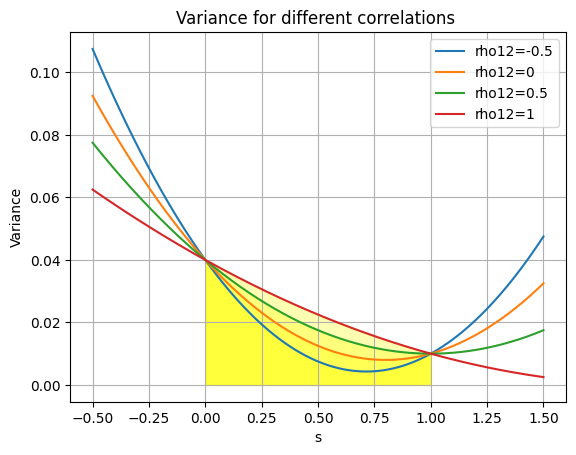

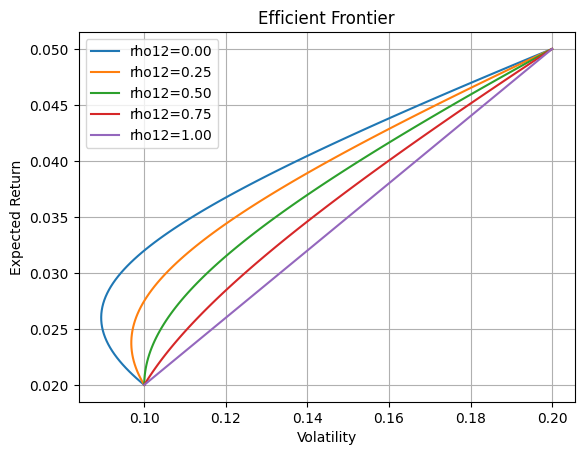

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the assets
sigma1 = 0.2  # Volatility of asset 1
sigma2 = 0.1  # Volatility of asset 2
mu1 = 0.05    # Return of asset 1
mu2 = 0.02    # Return of asset 2
rho12_values = [-0.5, 0, 0.5, 1]  # Correlation values to plot

# Function to compute sigma^2_V for given s and rho12
def sigma_squared_V(s, sigma1, sigma2, rho12):
    return (1 - s)**2 * sigma1**2 + s**2 * sigma2**2 + 2 * s * (1 - s) * rho12 * sigma1 * sigma2

# Function to compute s0 from Theorem 5.5
def s_min(sigma1, sigma2, rho12):
    numerator = sigma2**2 - rho12 * sigma1 * sigma2
    denominator = sigma1**2 + sigma2**2 - 2 * rho12 * sigma1 * sigma2
    return numerator / denominator

# Compute and plot sigma^2_V for different values of s
s_vals = np.linspace(-0.5, 1.5, 500)  # Allow values outside 0 to 1 for plotting

for rho12 in rho12_values:
    sigma_V_squared_vals = sigma_squared_V(s_vals, sigma1, sigma2, rho12)

    # Plot the full range for sigma_V^2
    plt.plot(s_vals, sigma_V_squared_vals, label=f'rho12={rho12}')

    # Compute s_min for the current rho12
    s0 = s_min(sigma1, sigma2, rho12)
    if s0 < 0:
        s_min_val = 0
    elif s0 > 1:
        s_min_val = 1
    else:
        s_min_val = s0

    # Highlight the range where no short selling is allowed (0 <= s <= 1)
    mask = (s_vals >= 0) & (s_vals <= 1)
    plt.fill_between(s_vals[mask], sigma_V_squared_vals[mask], color='yellow', alpha=0.3)

plt.title("Variance for different correlations ")
plt.xlabel('s')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

# Now plot in the (mu, sigma) space for rho12 between 0 and 1
s_vals = np.linspace(0, 1, 100)
rho12_range = np.linspace(0, 1, 5)  # Varying rho12 between 0 and 1

for rho12 in rho12_range:
    mu_V_vals = (1 - s_vals) * mu1 + s_vals * mu2
    sigma_V_vals = np.sqrt(sigma_squared_V(s_vals, sigma1, sigma2, rho12))

    plt.plot(sigma_V_vals, mu_V_vals, label=f'rho12={rho12:.2f}')

plt.title("Efficient Frontier")
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()


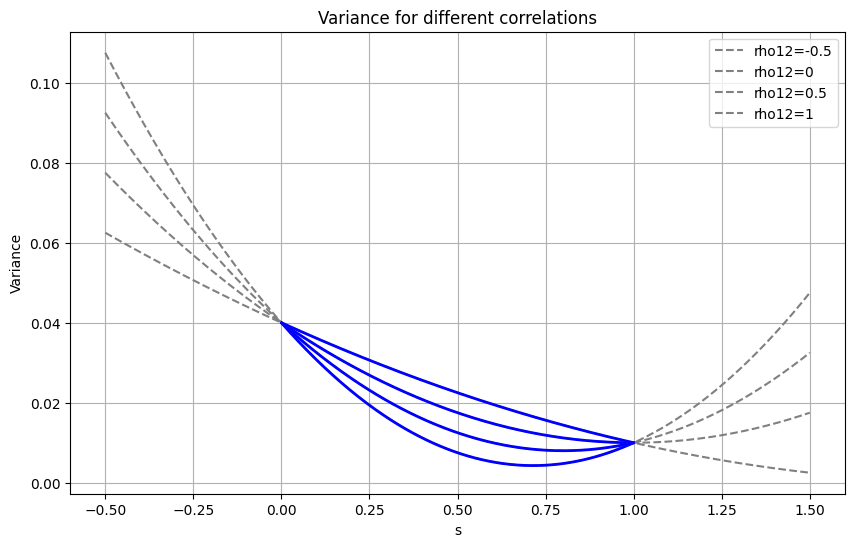

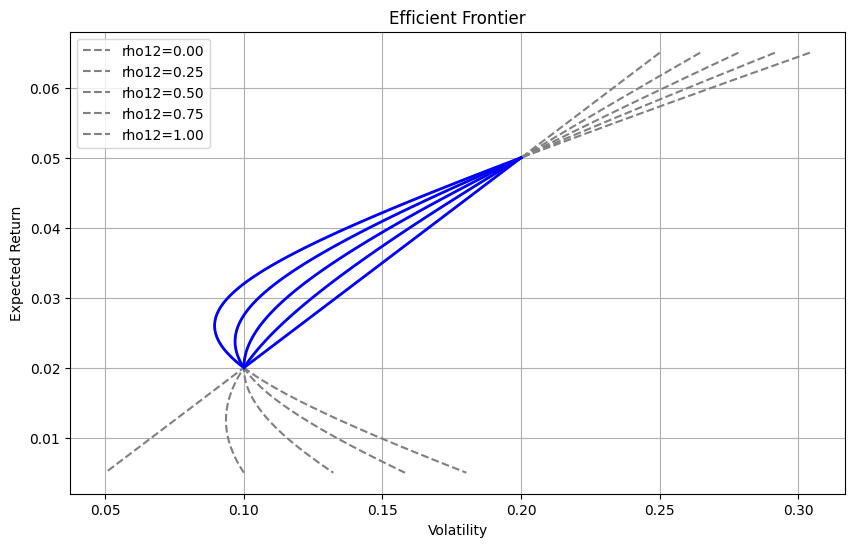

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the assets
sigma1 = 0.2  # Volatility of asset 1
sigma2 = 0.1  # Volatility of asset 2
mu1 = 0.05    # Return of asset 1
mu2 = 0.02    # Return of asset 2
rho12_values = [-0.5, 0, 0.5, 1]  # Correlation values to plot

# Function to compute sigma^2_V for given s and rho12
def sigma_squared_V(s, sigma1, sigma2, rho12):
    return (1 - s)**2 * sigma1**2 + s**2 * sigma2**2 + 2 * s * (1 - s) * rho12 * sigma1 * sigma2

# Function to compute s0 from Theorem 5.5
def s_min(sigma1, sigma2, rho12):
    numerator = sigma2**2 - rho12 * sigma1 * sigma2
    denominator = sigma1**2 + sigma2**2 - 2 * rho12 * sigma1 * sigma2
    return numerator / denominator

# Plot the variance (sigma_V^2) for different rho12 values
s_vals = np.linspace(-0.5, 1.5, 500)  # Allow values outside 0 to 1 for plotting

plt.figure(figsize=(10, 6))

for rho12 in rho12_values:
    sigma_V_squared_vals = sigma_squared_V(s_vals, sigma1, sigma2, rho12)

    # Plot the full range for sigma_V^2
    plt.plot(s_vals, sigma_V_squared_vals, label=f'rho12={rho12}', color='gray', linestyle='--')

    # Compute s_min for the current rho12
    s0 = s_min(sigma1, sigma2, rho12)
    if s0 < 0:
        s_min_val = 0
    elif s0 > 1:
        s_min_val = 1
    else:
        s_min_val = s0

    # Highlight the range where no short selling is allowed (0 <= s <= 1)
    mask = (s_vals >= 0) & (s_vals <= 1)
    plt.plot(s_vals[mask], sigma_V_squared_vals[mask], color='blue', linewidth=2)

plt.title("Variance for different correlations")
plt.xlabel('s')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

# Now plot in the (mu, sigma) space for rho12 between 0 and 1
s_vals = np.linspace(-0.5, 1.5, 500)
s_valid = np.linspace(0, 1, 100)  # Values for the efficient frontier without short selling
rho12_range = np.linspace(0, 1, 5)  # Varying rho12 between 0 and 1

plt.figure(figsize=(10, 6))

for rho12 in rho12_range:
    mu_V_vals = (1 - s_vals) * mu1 + s_vals * mu2
    sigma_V_vals = np.sqrt(sigma_squared_V(s_vals, sigma1, sigma2, rho12))

    # Plot the full frontier (outside short selling bounds) in dashed gray
    plt.plot(sigma_V_vals, mu_V_vals, label=f'rho12={rho12:.2f}', color='gray', linestyle='--')

    # Plot the efficient frontier where no short selling is allowed (0 <= s <= 1) in blue
    mu_V_no_short = (1 - s_valid) * mu1 + s_valid * mu2
    sigma_V_no_short = np.sqrt(sigma_squared_V(s_valid, sigma1, sigma2, rho12))
    plt.plot(sigma_V_no_short, mu_V_no_short, color='blue', linewidth=2)

plt.title("Efficient Frontier")
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()
